In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('diabetes.csv')

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
y_pred_logreg = logreg.predict(X_test_scaled)

In [21]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

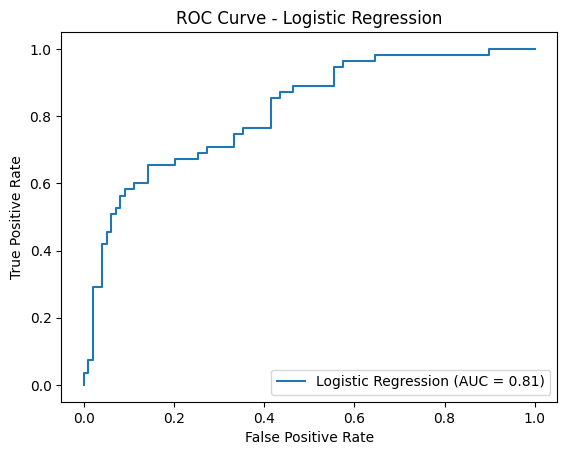

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [24]:
y_pred_knn = knn.predict(X_test_scaled)

In [25]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])

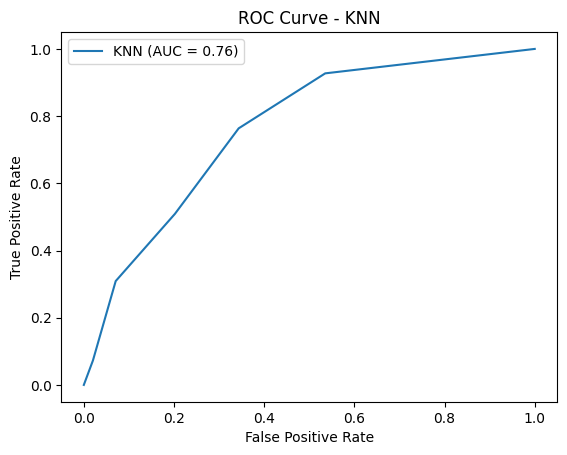

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

In [27]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

SVC(probability=True)

In [28]:
y_pred_svm = svm.predict(X_test_scaled)

In [29]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1])

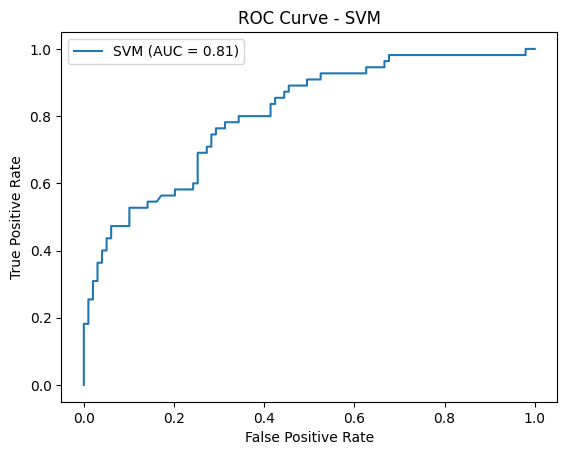

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc_svm:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5)

In [32]:
y_pred_dt = dt.predict(X_test_scaled)

In [33]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1])

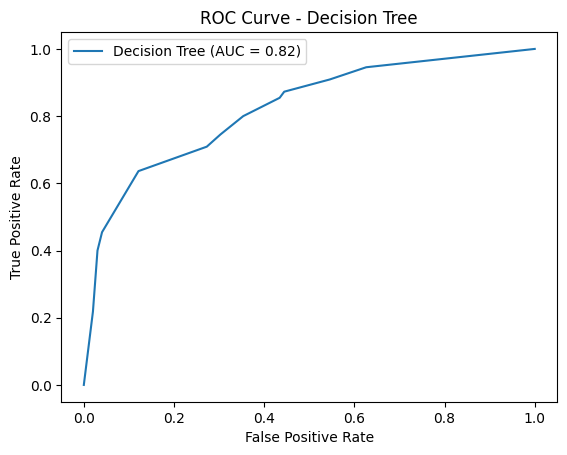

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import auc

model_names = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree']
accuracies = [accuracy_logreg, accuracy_knn, accuracy_svm, accuracy_dt]
auc_scores = [auc_logreg, auc_knn, auc_svm, auc_dt]

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(model_names, auc_scores, color='lightgreen')
plt.title('Comparison of Model AUC Scores')
plt.ylabel('AUC Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
